<a href="https://colab.research.google.com/github/Mund99/Medium_Writing/blob/main/spx_spxew_analysis/spx_spxew_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

# Define the ticker symbols
spx_ticker = "^GSPC"  # S&P 500 Index
spxew_ticker = "^SP500EW"  # S&P 500 Equal Weight Index

# Download data
start_date = "2007-01-01"
end_date = pd.to_datetime('today')

spx_data = yf.download(spx_ticker, start=start_date, end=end_date)
spxew_data = yf.download(spxew_ticker, start=start_date, end=end_date)

# Combine the closing prices
df = pd.DataFrame({
    'SPX': spx_data['Close'],
    'SPXEW': spxew_data['Close']
})

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
# Normalize closing prices
df['SPX_Normalized'] = df['SPX'] / df['SPX'].iloc[0]
df['SPXEW_Normalized'] = df['SPXEW'] / df['SPXEW'].iloc[0]


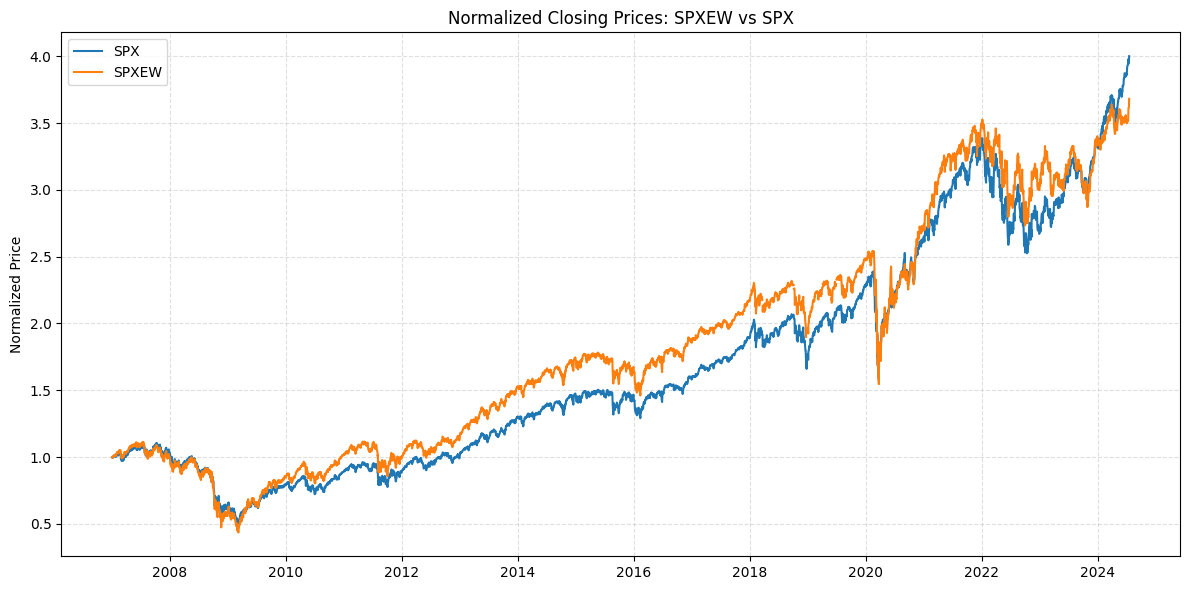

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
colors = {'SPX': '#1f77b4', 'SPXEW': '#ff7f0e'}

ax.plot(df.index, df['SPX_Normalized'], label='SPX', color=colors['SPX'])
ax.plot(df.index, df['SPXEW_Normalized'], label='SPXEW', color=colors['SPXEW'])
ax.set_title('Normalized Closing Prices: SPXEW vs SPX')
ax.set_ylabel('Normalized Price')
ax.legend()
ax.grid(visible=True, alpha=0.4, linestyle='--')

ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [10]:
# Calculate daily returns
df['SPX_Return'] = df['SPX'].pct_change()
df['SPXEW_Return'] = df['SPXEW'].pct_change()

# Calculate the return spread
df['Return_Spread'] = df['SPXEW_Return'] - df['SPX_Return']

# Calculate outlier bounds (3 standard deviations)
mean_spread = df['Return_Spread'].mean()
std_spread = df['Return_Spread'].std()
upper_bound = mean_spread + 3 * std_spread
lower_bound = mean_spread - 3 * std_spread

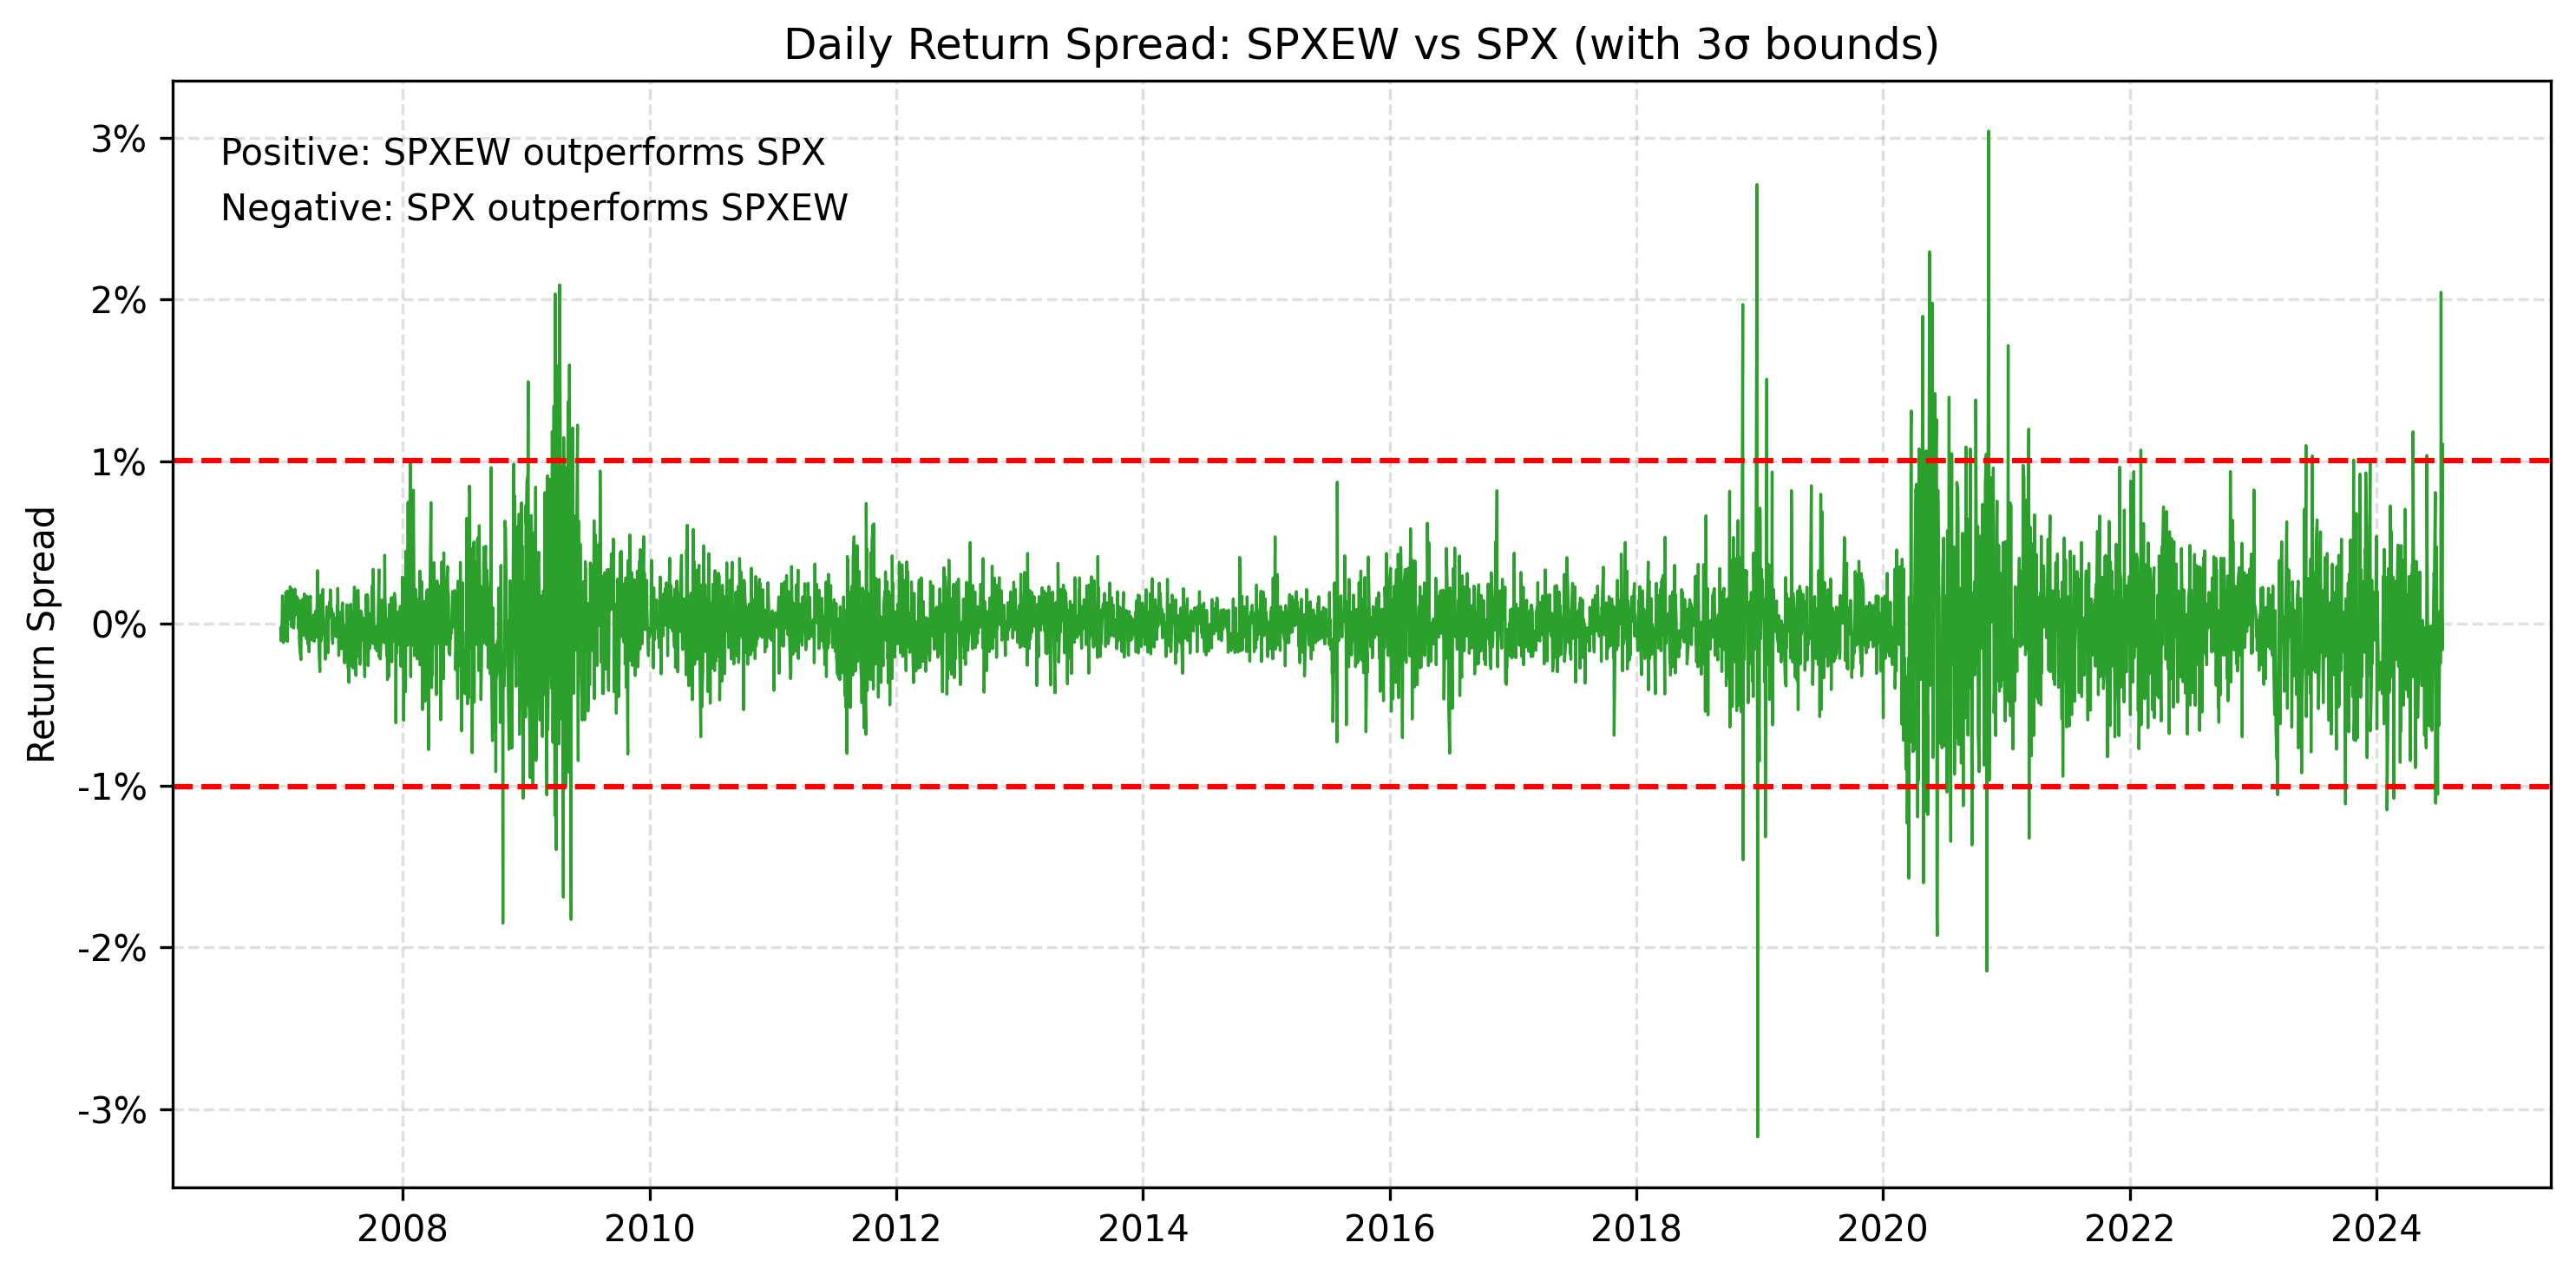

In [11]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)
colors = {'SPX': '#1f77b4', 'SPXEW': '#ff7f0e'}

def percentage_formatter(x, pos):
    return f'{100*x:.0f}%'

ax.plot(df.index, df['Return_Spread'], linewidth=0.8, color='#2ca02c')
ax.axhline(y=upper_bound, color='r', linestyle='--')
ax.axhline(y=lower_bound, color='r', linestyle='--')
ax.set_title('Daily Return Spread: SPXEW vs SPX (with 3σ bounds)')
ax.set_ylabel('Return Spread')
ax.grid(visible=True, alpha=0.4, linestyle='--')
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax.text(0.02, 0.95, 'Positive: SPXEW outperforms SPX', transform=ax.transAxes,
        verticalalignment='top', fontsize=10, alpha=1)
ax.text(0.02, 0.90, 'Negative: SPX outperforms SPXEW', transform=ax.transAxes,
        verticalalignment='top', fontsize=10, alpha=1)

ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

In [12]:
# Calculate cumulative return spread
df['Cumulative_Return_Spread'] = (1 + df['Return_Spread']).cumprod() - 1

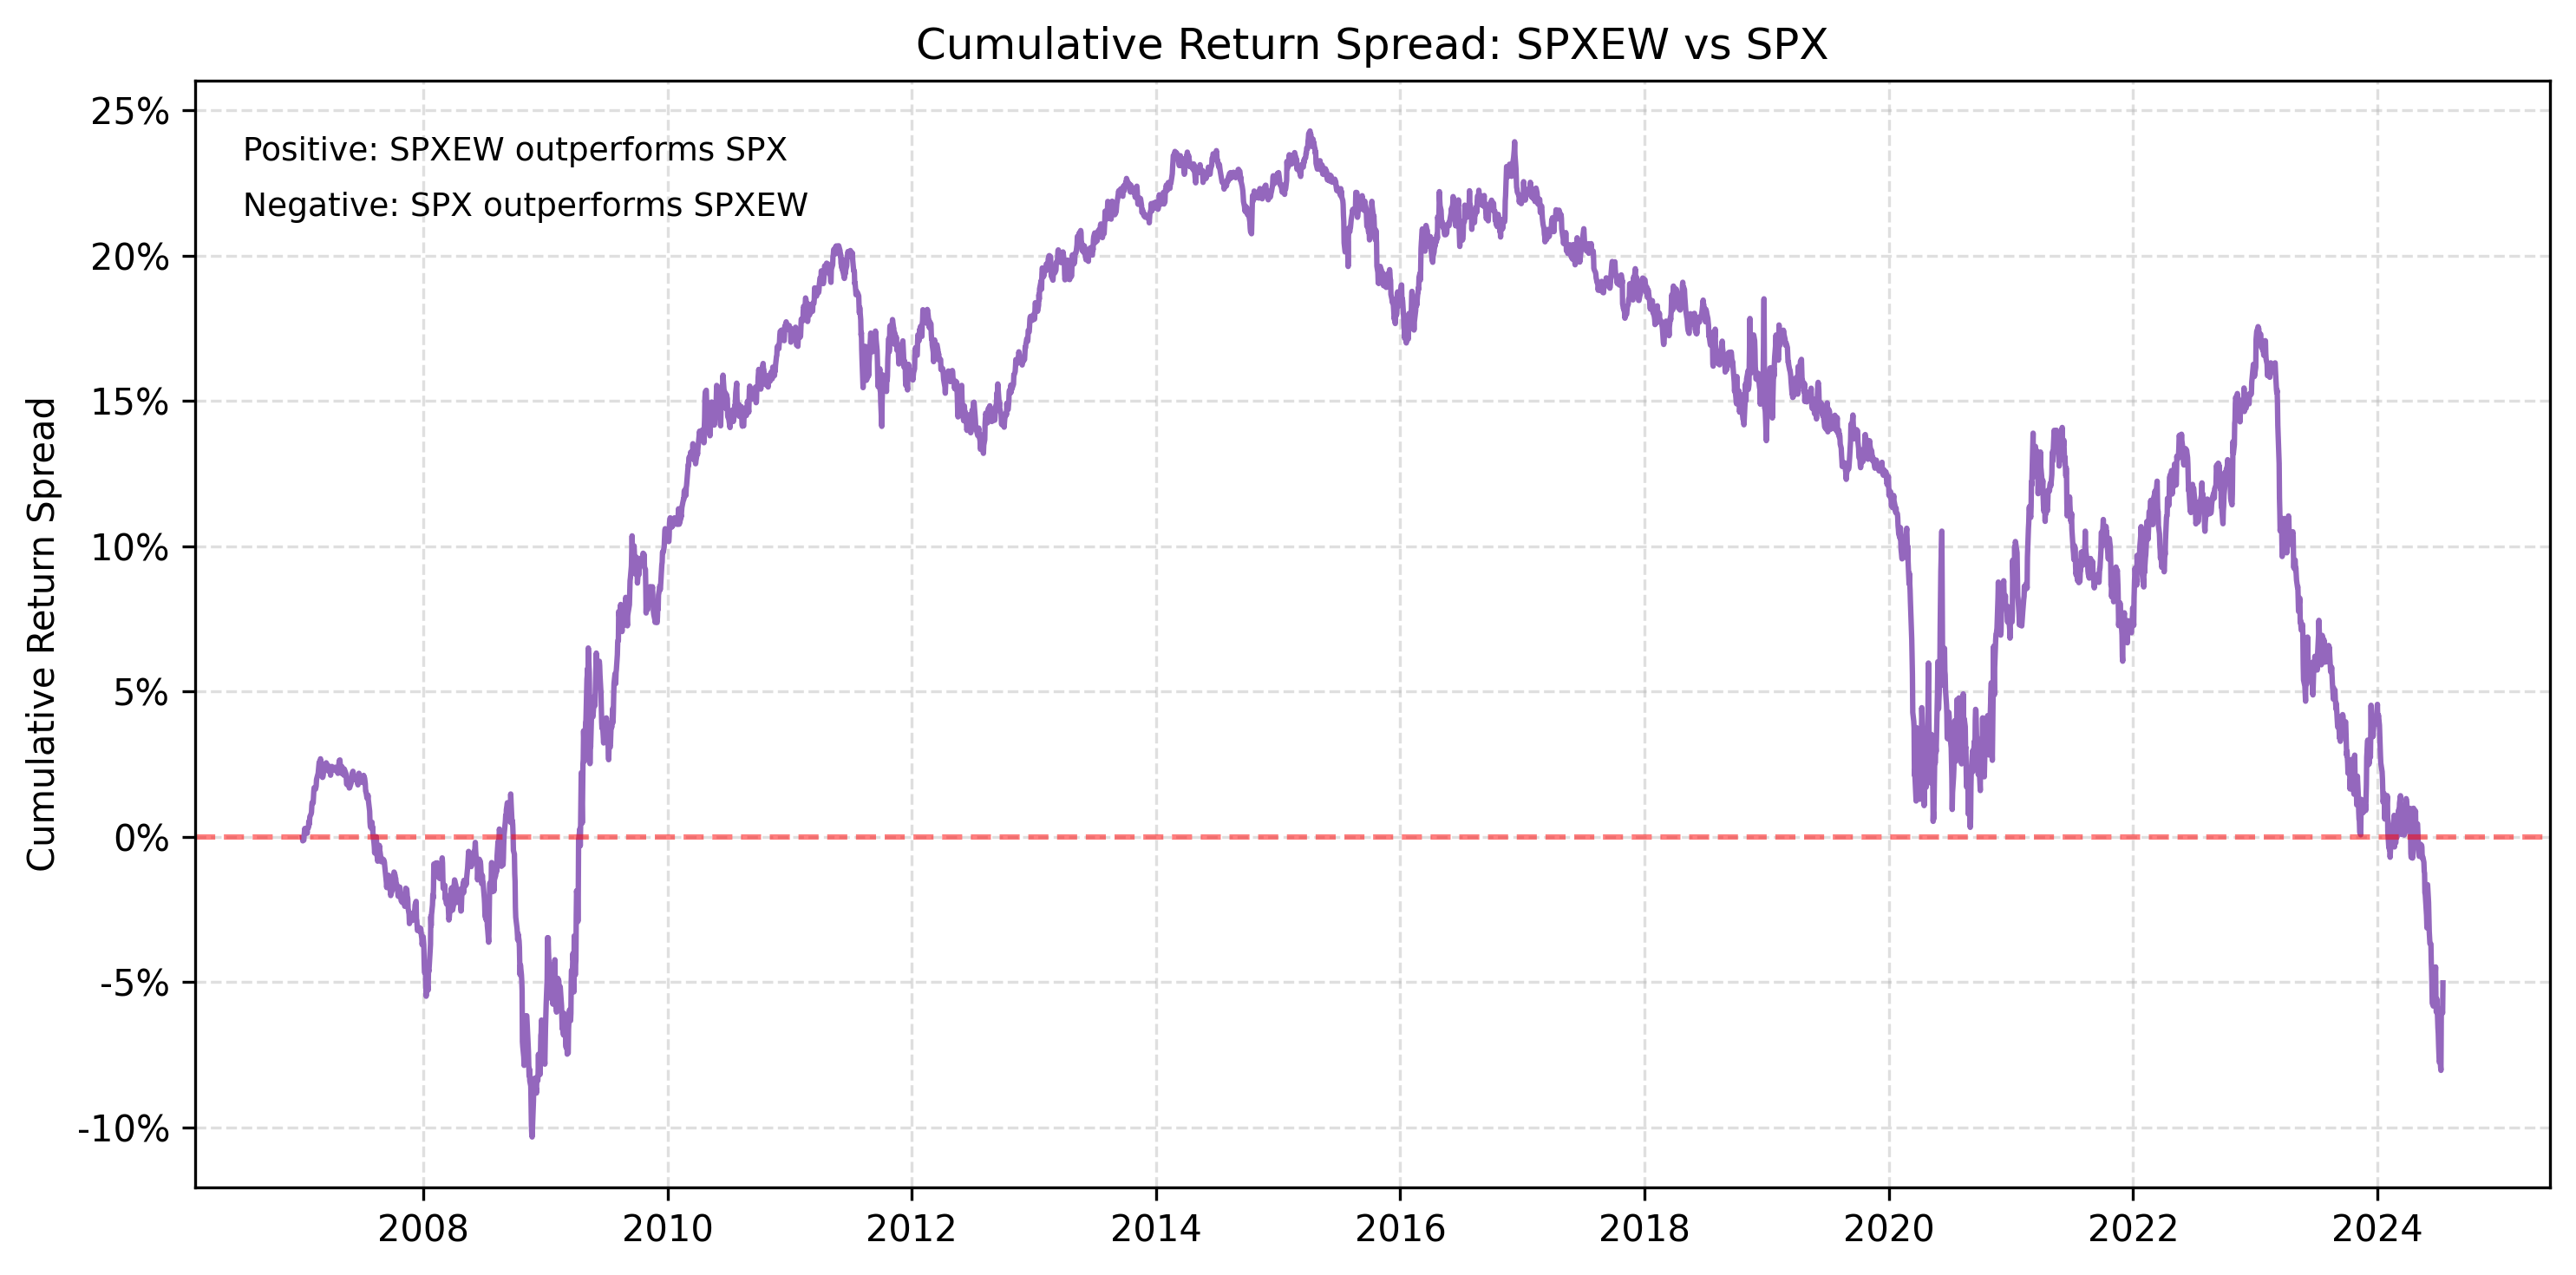

In [13]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

ax.plot(df.index, df['Cumulative_Return_Spread'], color='#9467bd')
ax.set_title('Cumulative Return Spread: SPXEW vs SPX')
ax.set_ylabel('Cumulative Return Spread')
ax.grid(visible=True, alpha=0.4, linestyle='--')
ax.axhline(y=0, color='red', linestyle='--', alpha=0.5)
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))
ax.text(0.02, 0.95, 'Positive: SPXEW outperforms SPX', transform=ax.transAxes,
         verticalalignment='top', fontsize=9, alpha=1)
ax.text(0.02, 0.90, 'Negative: SPX outperforms SPXEW', transform=ax.transAxes,
         verticalalignment='top', fontsize=9, alpha=1)

plt.tight_layout()
plt.show()

In [14]:
# Calculate rolling volatility (252 trading days ≈ 1 year)
df['SPX_Volatility'] = df['SPX_Return'].rolling(window=252).std() * np.sqrt(252)
df['SPXEW_Volatility'] = df['SPXEW_Return'].rolling(window=252).std() * np.sqrt(252)

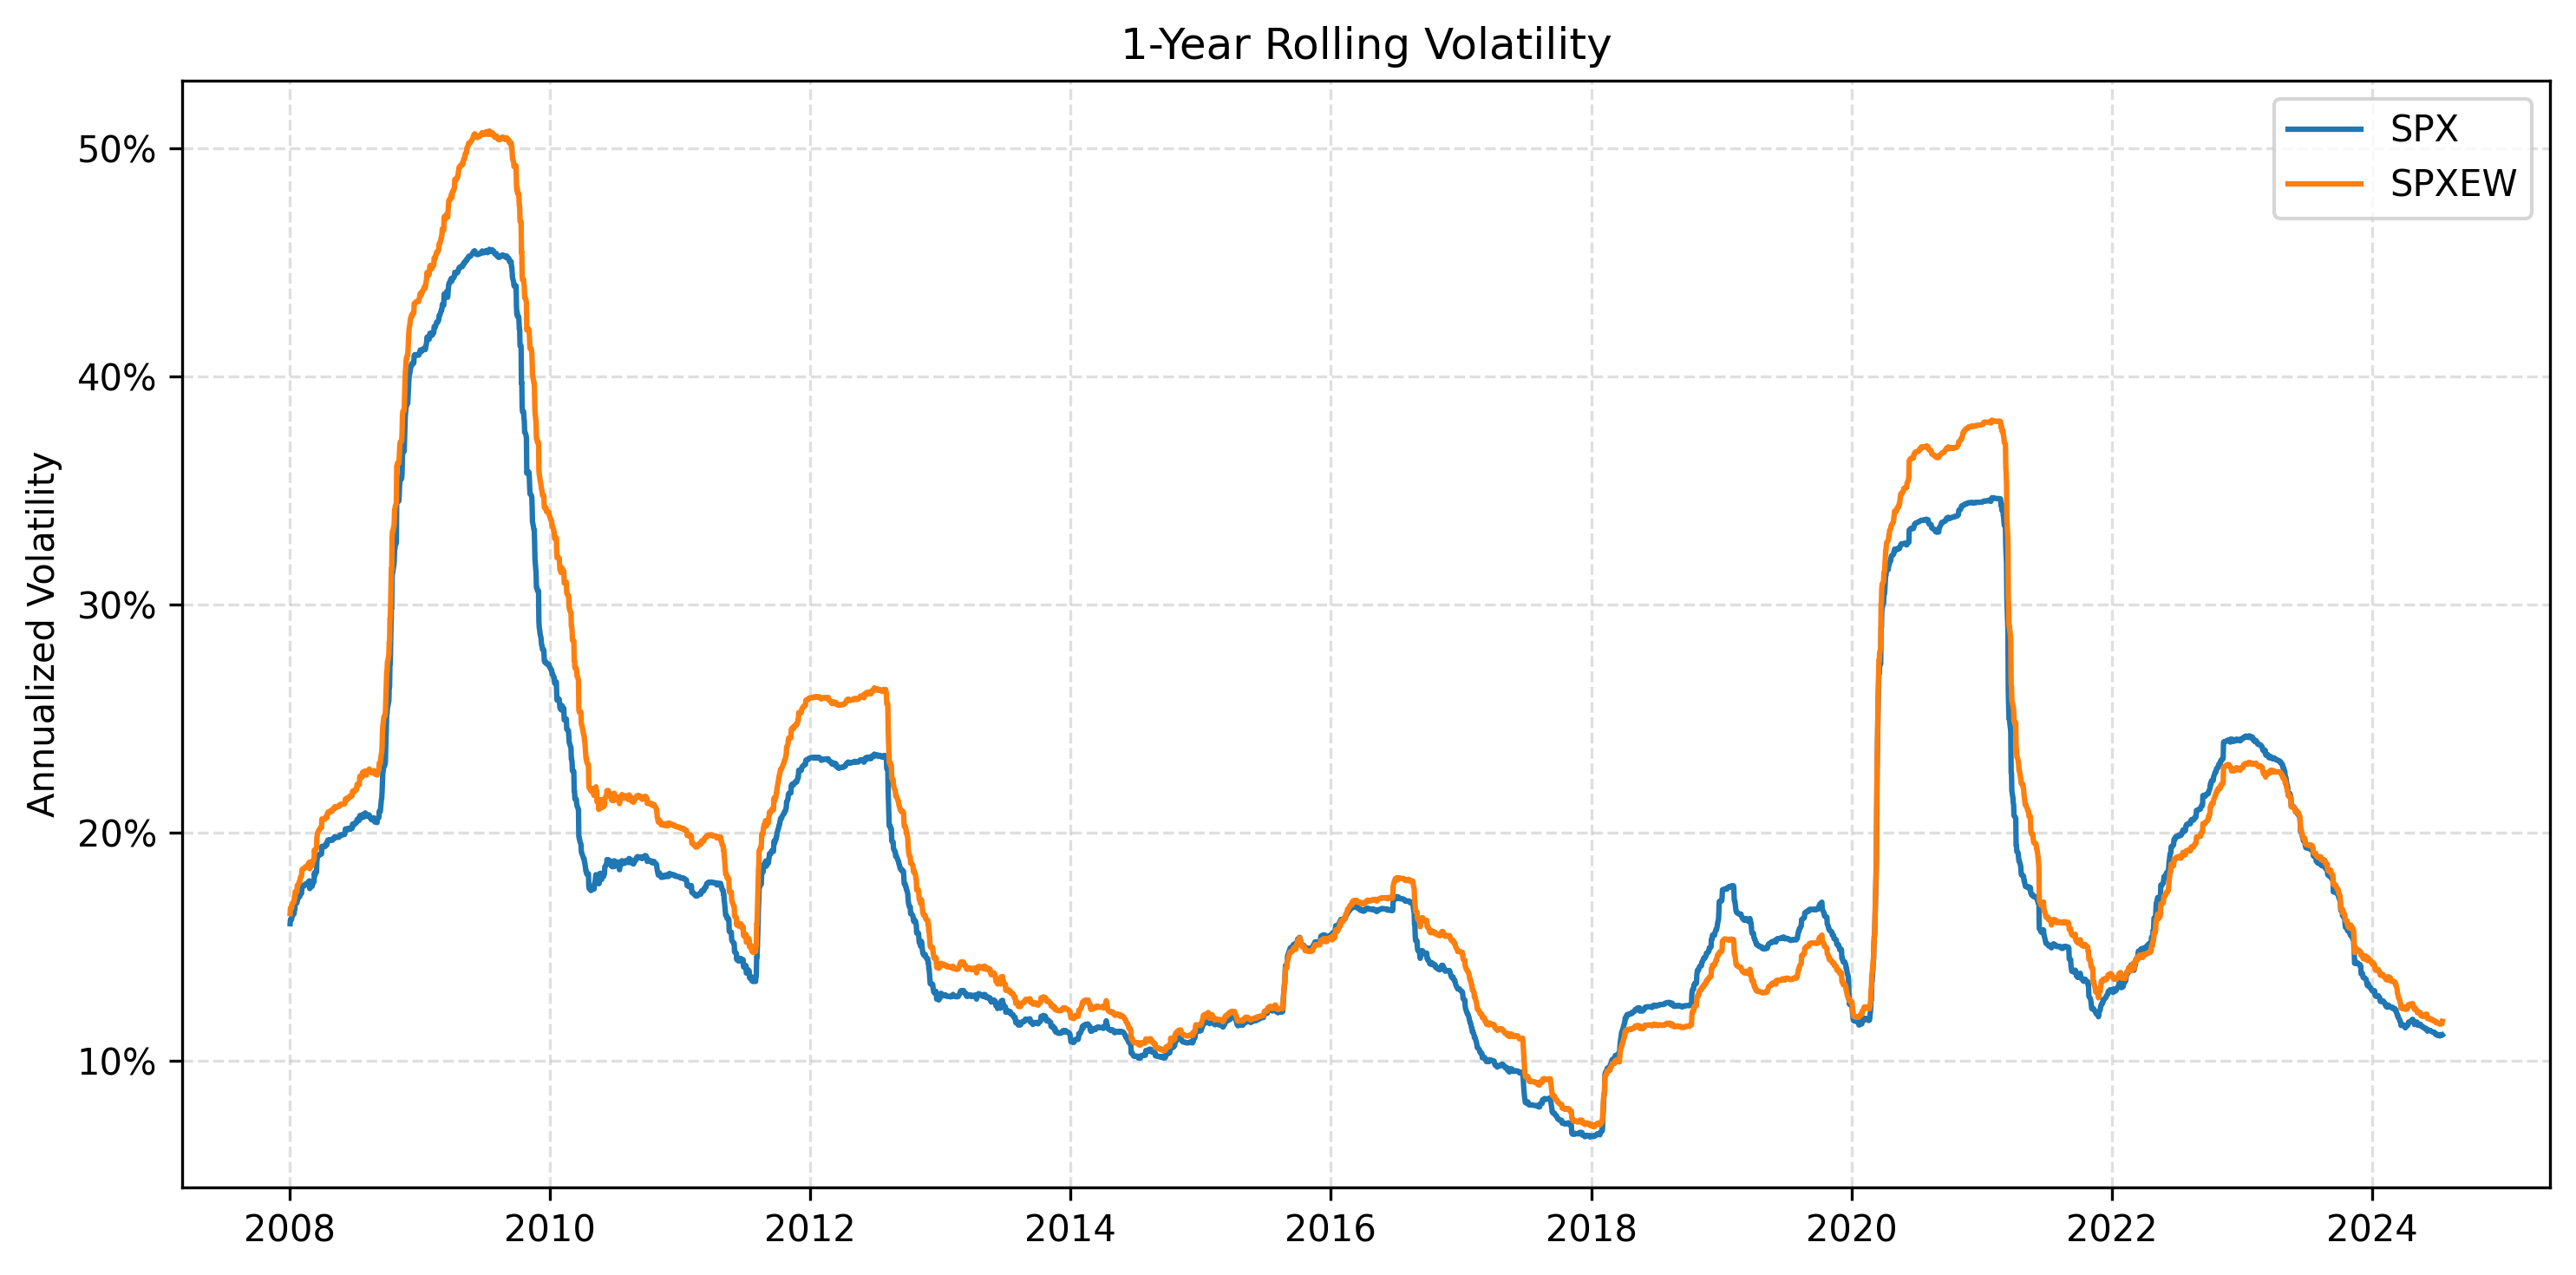

In [15]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

ax.plot(df.index, df['SPX_Volatility'], label='SPX', color=colors['SPX'])
ax.plot(df.index, df['SPXEW_Volatility'], label='SPXEW', color=colors['SPXEW'])
ax.set_title('1-Year Rolling Volatility')
ax.set_ylabel('Annualized Volatility')
ax.legend()
ax.grid(visible=True, alpha=0.4, linestyle='--')
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.tight_layout()
plt.show()

In [16]:
# Calculate drawdowns
def calculate_drawdown(prices):
    return (prices - prices.cummax()) / prices.cummax()

df['SPX_Drawdown'] = calculate_drawdown(df['SPX'])
df['SPXEW_Drawdown'] = calculate_drawdown(df['SPXEW'])

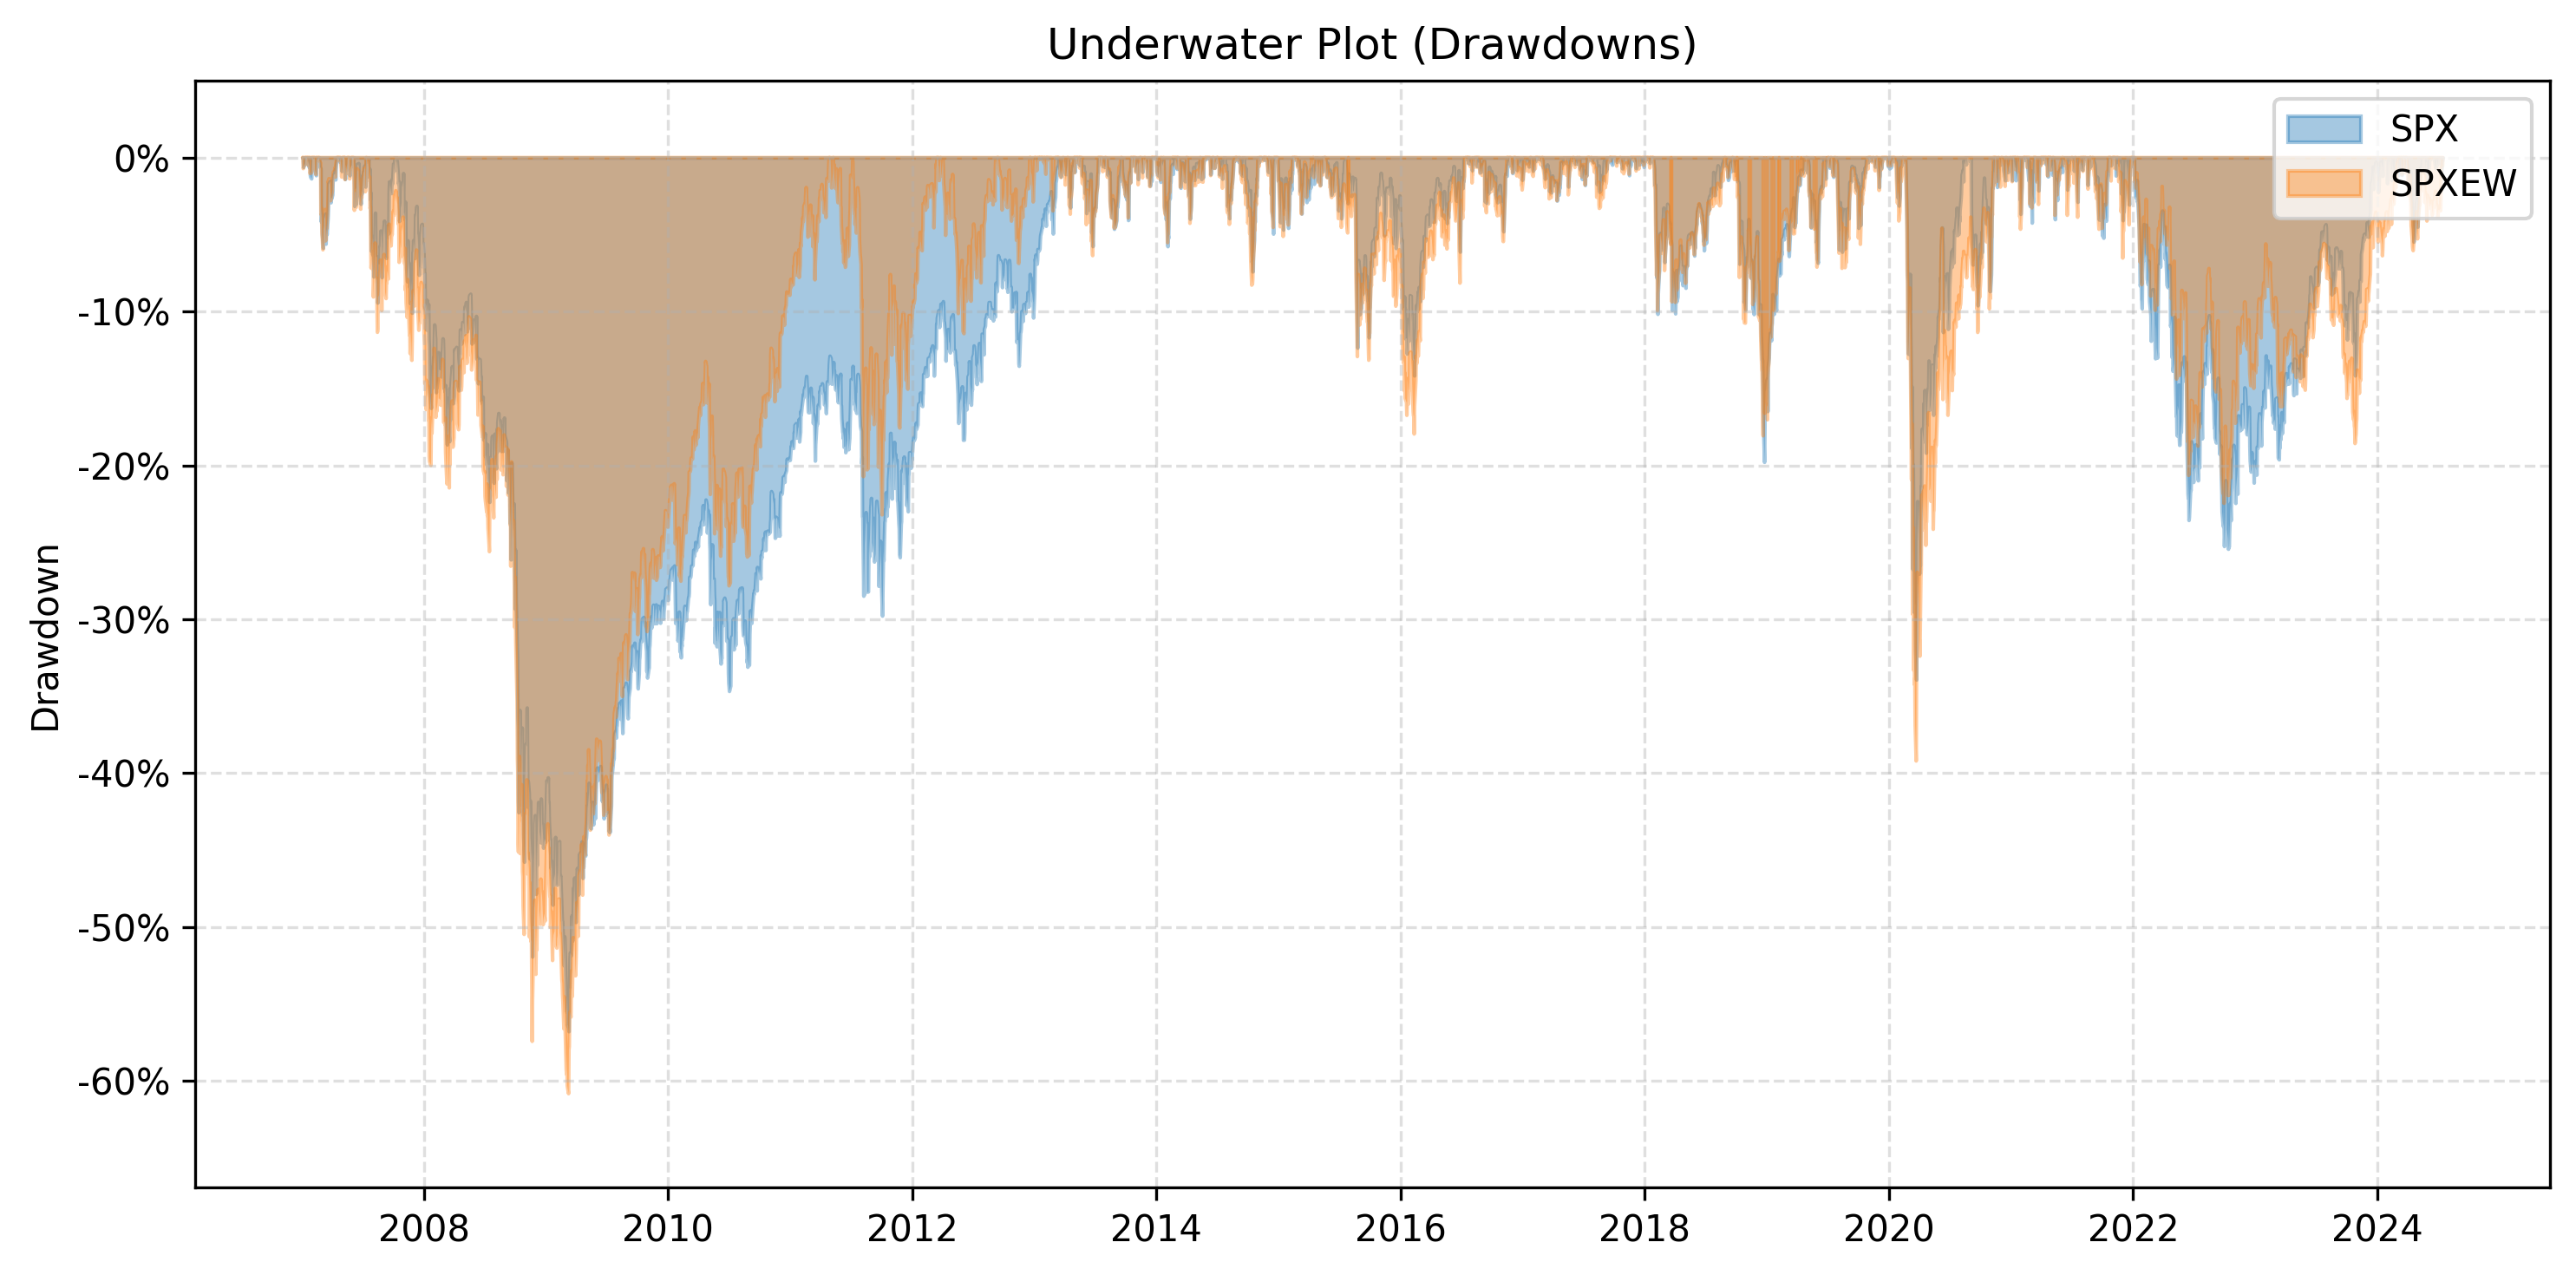

In [17]:
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

ax.fill_between(df.index, df['SPX_Drawdown'], 0, alpha=0.4, label='SPX', color=colors['SPX'])
ax.fill_between(df.index, df['SPXEW_Drawdown'], 0, alpha=0.4, label='SPXEW', color=colors['SPXEW'])
ax.set_title('Underwater Plot (Drawdowns)')
ax.set_ylabel('Drawdown')
ax.legend()
ax.grid(visible=True, alpha=0.4, linestyle='--')
ax.set_ylim(df[['SPX_Drawdown', 'SPXEW_Drawdown']].min().min() * 1.1, 0.05)
ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))

plt.tight_layout()
plt.show()